## Impact Analysis of CoVID-19 on Australian Economy and Business

COVID-19 has significantly impacted people, health, businesses, industries, unemployment, workers and international trade over the last couple of months. This project outlines the hypothesis related to the impact of CODIV-19 on Australian business and economy. It also presents the analysis of the state of businesses in Australia throughout the COVID-19 pandemic from mid-March’20 through to latest business impacts in June’21.

**Questions:**
1. What was the immediate impact on Australian economy in terms of GDP and supply chain measures 
2. How has been the Australian Dollar Trade-weighted Index as the COVID-19 infections rose during June'20? 
3. Was there an overall impact to the Income - Company Gross Operating Profits and Wages/ Salaries. Also what was the impact to Incomes industries-wise? 


## Instructions - Your tasks are to do the following:
1. Use Pandas to clean and format your data set(s)
2. Create a Jupyter Notebook describing the **data exploration and cleanup** process
3. Create a Jupyter Notebook illustrating the **final data analysis**
4. Use Matplotlib to create a total of 6-8 visualizations of your data (ideally, at least 2 per "question" you ask of your data)
5. Save PNG images of your visualizations to distribute to the class and instructional team, and for inclusion in your presentation
6. Optionally, use at least one API, if you can find an API with data pertinent to your primary research questions
7. Create a write-up summarizing your major findings. This should include a heading for each "question" you asked of your data, and under each heading, a short description of what you found and any relevant plots.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

In [2]:
# Read the covid-19 quarterly GDP and the chain volume levels data and analyse/ study results
covid_Business_GDP = "Data/Business/GDP.csv"
covid_Business_GDP = pd.read_csv(covid_Business_GDP)

quarter_data = covid_Business_GDP["Quarterly"]
quarterly_growth = covid_Business_GDP["Quarterly growth (%)"]
levels = covid_Business_GDP["Levels (RHS) ($b)"]


covid_Infection_Counts = "Data/Business/covid.csv"
covid_Infection_Counts = pd.read_csv(covid_Infection_Counts)
covid_Business_GDP.tail(15)

,Quarterly,Levels (RHS) ($b),Quarterly growth (%)
15,Dec-17,475.4,0.5
16,Mar-18,479.4,0.8
17,Jun-18,483.4,0.8
18,Sep-18,486.0,0.5
19,Dec-18,486.7,0.1
20,Mar-19,488.7,0.4
21,Jun-19,491.4,0.6
22,Sep-19,495.3,0.8
23,Dec-19,497.1,0.4
24,Mar-20,495.5,-0.3


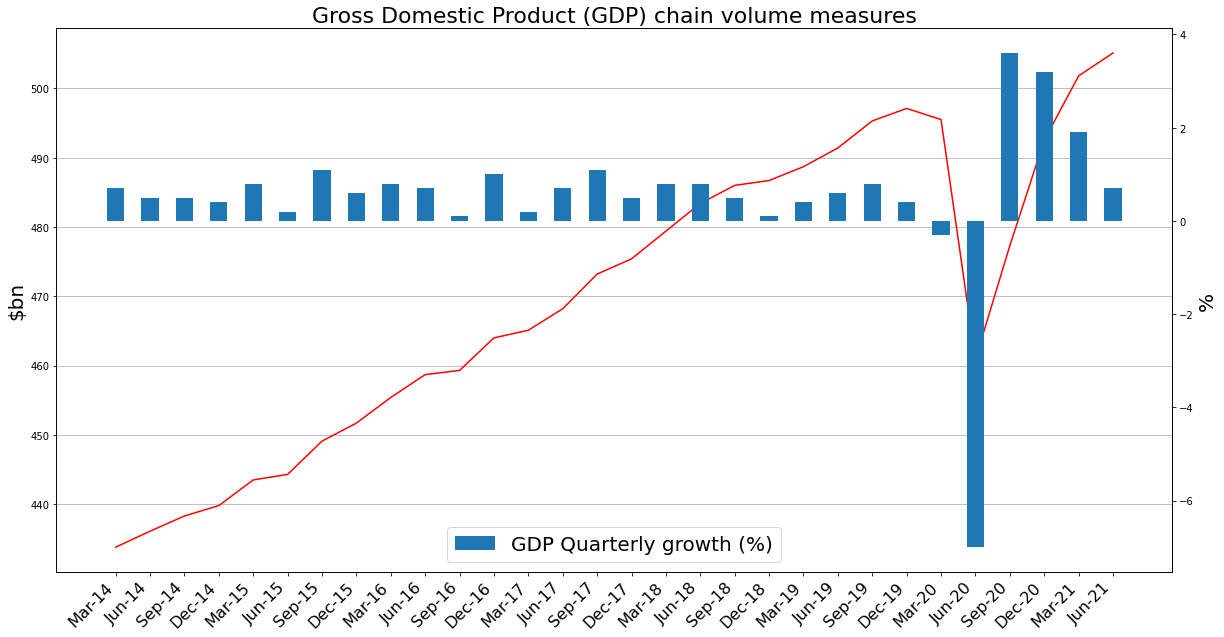

In [3]:
#Plot the bar and line graphs for GDP Quarterly growth (%) and chain volume measures

fig1, ax1 = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=45, ha='right',fontsize = 16)
plt.plot(quarter_data, levels, color='r',label="GDP Levels ($b)")
plt.grid(b=None, which='major', axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel("%", fontsize = 20)
ax1.set_ylabel("$bn", fontsize = 20)
plt.bar(quarter_data, quarterly_growth, color='tab:blue',align='center',width=.5, label="GDP Quarterly growth (%)")
plt.legend(loc='lower center', fontsize = 20)
plt.title("Gross Domestic Product (GDP) chain volume measures", fontsize = 22)
plt.savefig("Analysis/Business/Gross domestic product.png")
plt.show()

In [4]:
# Read the ABS contributions to quarterly growth in GDP, chain volume measures, seasonally adjusted
contributions_GDP = "Data/Business/ContributionsGDP.csv"
contributions_GDP = pd.read_csv(contributions_GDP)

quarter_data = contributions_GDP["Quarterly"]
GDP = contributions_GDP["GDP (ppt)"]
public_Demand = contributions_GDP["Public demand (ppt)"]
private_Demand = contributions_GDP["Private demand (ppt)"]
change_Inventories = contributions_GDP["Changes in inventories (ppt)"]
net_exports = contributions_GDP["Net exports (ppt)"]

contributions_GDP.tail()

,Quarterly,GDP (ppt),Public demand (ppt),Private demand (ppt),Changes in inventories (ppt),Net exports (ppt)
25,Jun-20,-7.0,0.4,-7.7,-0.6,1.0
26,Sep-20,3.6,0.4,4.1,1.0,-1.8
27,Dec-20,3.2,0.3,3.0,-0.1,-0.1
28,Mar-21,1.9,0.1,1.8,0.7,-0.6
29,Jun-21,0.7,0.7,1.0,-0.2,-1.0


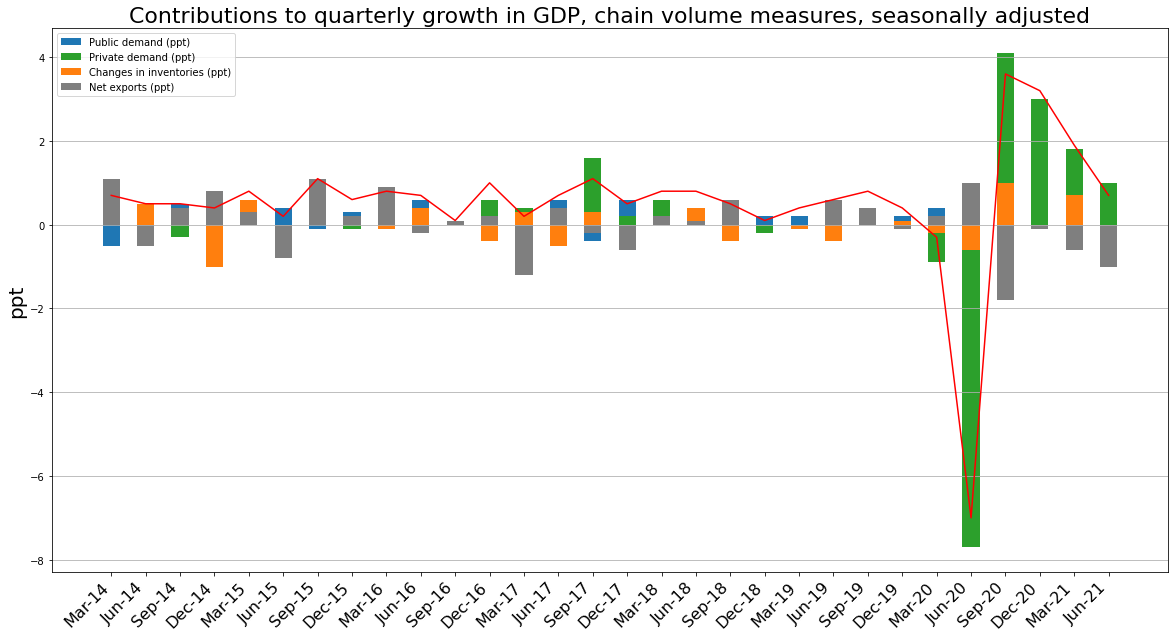

In [5]:
#Plot the stacked bar and line graphs to show/ analyse contributions to GDP

fig1, ax1 = plt.subplots(figsize=(20, 10))
plt.plot(quarter_data, GDP, color='r')
plt.xticks(rotation=45, ha='right', fontsize = 16)

plt.bar(quarter_data, public_Demand, color='tab:blue',align='center',label="Public demand (ppt)",width=.5)
plt.bar(quarter_data, private_Demand, color='tab:green',align='center',label="Private demand (ppt)", width=.5)
plt.bar(quarter_data, change_Inventories, color='tab:orange',align='center',label="Changes in inventories (ppt)", width=.5)
plt.bar(quarter_data, net_exports, color='tab:gray',align='center',label="Net exports (ppt)",width=.5)


plt.grid(b=None, which='major', axis='y')
ax1.set_ylabel("ppt", fontsize = 20)
ax1.legend()

plt.title("Contributions to quarterly growth in GDP, chain volume measures, seasonally adjusted", fontsize = 22)
plt.savefig("Analysis/Business/Contributions to GDP.png")
plt.show()

*1. Impact to Gross Domestic Product (GDP), chain volume measures seasonally adjusted**

**Australian economy fell an unprecedented 7.0% in June'20 quarter**
Gross Domestic Product (GDP) fell a historic 7.0% this quarter, as the COVID-19 pandemic and the corresponding movement restrictions continued to impact economic activity. This records the first annual estimate of GDP for 2019/20, which fell 0.2%, ending Australia's longest streak of continuous growth, 28 years.

**Australian economy rose 0.7% in June'21 quarter**
Gross Domestic Product (GDP) rose 0.7% this quarter, reflecting the continued easing of COVID-19 restrictions and the recovery in the labour market. Lockdowns had minimal impact on activity overall, with fewer lockdown days and the more prolonged stay-at-home orders in NSW only commencing in the last week of June'21. The Australian economy grew by 1.4% over 2020-21.

**Steep decline in Private demand and hence the overall GDP when COVID-19 started during June'20 quarter**
Private demand drove the fall while detracting 7.9 percentage points from GDP, public demand partly offsets the fall, contributing 0.6 percentage points, as government increased spending in response to COVID-19. 

**Domestic demand drives growth during June'21 quarter**
The domestic economy drove growth, contributing 1.6 percentage points to the rise in GDP last quarter in June'21. Both private and public demand increased.

*2. Impact to Australian Dollar Exchange rates**

**The Australian Dollar depreciated** against the United States Dollar to levels not seen before the Global Financial Crisis (GFC) as the confirmed **at the advent of the pandemic (March'2020) when CoviD-19 cases started increasing in Australia.  

The correlation between covid infections cases and Australian Dollar Trade-weighted Index is -0.07 and shows an overall very slight negative corrrelation.

In [6]:
# Read the covid-19 business data and the study results
covid_Business_ExRates = "Data/Business/Exchange Rates.csv"
covid_Infection_Counts = "Data/Business/covid.csv"
covid_Business_ExRates = pd.read_csv(covid_Business_ExRates)
covid_Infection_Counts = pd.read_csv(covid_Infection_Counts)
covid_Business_ExRates.head()
covid_merged_df = pd.merge(covid_Business_ExRates, covid_Infection_Counts, on='Monthly')
covid_merged_df.tail()

,Monthly,AUD/USD Exchange Rate,Australian Dollar Trade-weighted Index,Monthly cases
38,Mar-21,0.7602,63.9,331
39,Apr-21,0.7776,64.4,483
40,May-21,0.7725,63.5,319
41,Jun-21,0.7518,62.7,464
42,Jul-21,0.7381,61.6,3347


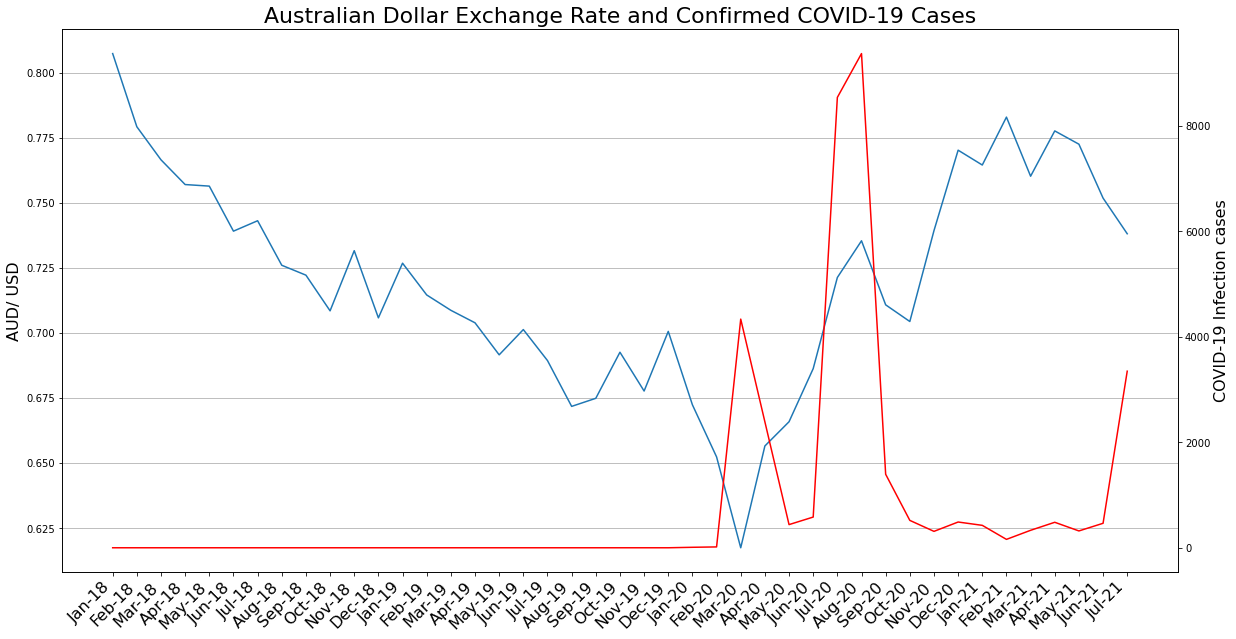

0.6175

In [14]:
monthly_data = covid_merged_df["Monthly"]
exchange_Rate = (covid_merged_df["AUD/USD Exchange Rate"])
covid_infections = covid_merged_df["Monthly cases"]
AUD_TWI = covid_merged_df["Australian Dollar Trade-weighted Index"]

T = np.array(monthly_data)
E = np.array(exchange_Rate)
I = np.array(covid_infections)

fig1, ax1 = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=45, ha='right', fontsize = 16)
plt.plot(T, E, color='tab:blue')
plt.grid(b=None, which='major', axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel("COVID-19 Infection cases", fontsize = 16)
ax1.set_ylabel("AUD/ USD", fontsize = 16)

plt.plot(T, I, color='red')
plt.title("Australian Dollar Exchange Rate and Confirmed COVID-19 Cases", fontsize = 22)
plt.savefig("Analysis/Business/Australian Dollar.png")
plt.show()
exchange_Rate.min()


The correlation between covid infections cases and Australian Dollar Trade-weighted Index is -0.07.
slope:-7.969762483354834e-05
intercept:61.28842945954606
rvalue (Correlation coefficient):-0.07322402015113276
stderr:0.00016952449453282157
r-squared: 0.005361757127093496
y = -8e-05x + 61.28843


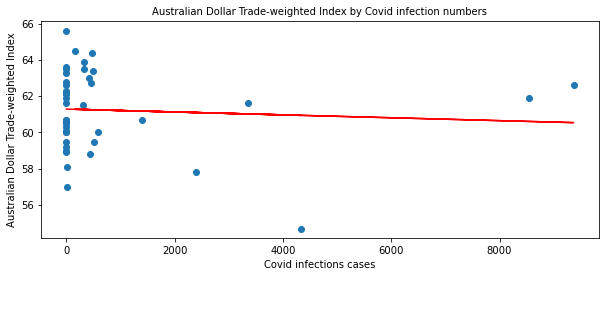

In [8]:
# Calculate the correlation coefficient between Australian dollar exchange rates and Confirmed CoVID-19 cases
correlation = st.pearsonr(covid_infections,AUD_TWI)

# Print the answer to above calculation
print(f"""The correlation between covid infections cases and Australian Dollar Trade-weighted Index is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(covid_infections,AUD_TWI)
regress_values = covid_infections * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")
print(f"r-squared: {rvalue**2}")
print(line_eq)

# Plot linear regression on top of scatter plot, Annotate linear regression, Add labels and title to plot
fig1, ax1 = plt.subplots(figsize=(10,4))
plt.scatter(covid_infections, AUD_TWI, color='tab:blue')
plt.plot(covid_infections,regress_values,"r-") 
plt.annotate(line_eq,(2000,50),fontsize=14,color="red")
plt.xlabel("Covid infections cases",fontsize =10)
plt.ylabel("Australian Dollar Trade-weighted Index",fontsize =10)
plt.title("Australian Dollar Trade-weighted Index by Covid infection numbers",fontsize =10)
plt.savefig("Analysis/Business/Australian Dollar Trade-weighted Index.png", bbox_inches = "tight")
plt.show()

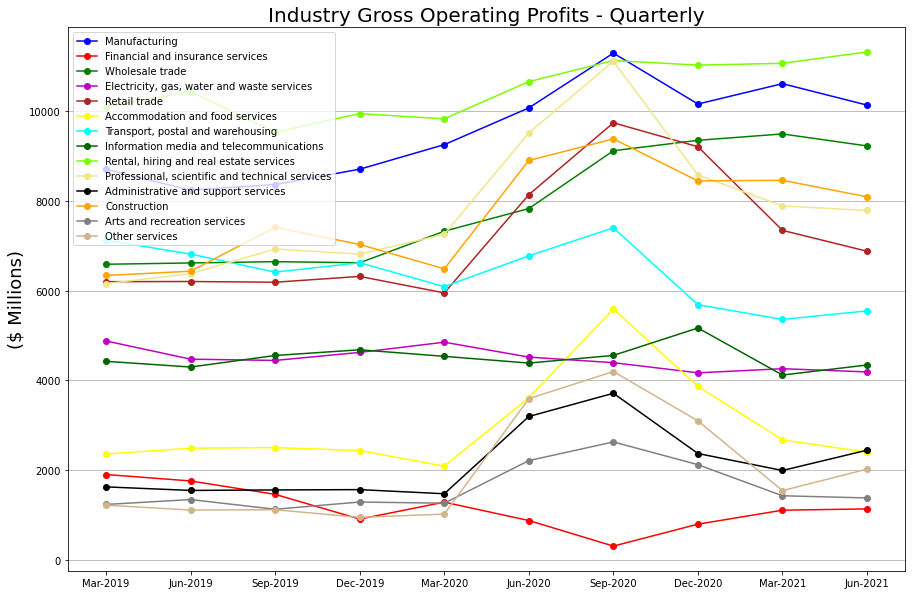

In [13]:
# Study data files
covid_BusinessGOPQ = "Data/Business/Business_GOP_Industry.csv"
covid_TotalGOPQ = "Data/Business/Total_GOPQ.csv"

# Read the covid-19 business data and the study results
covid_Business_GOPQ = pd.read_csv(covid_BusinessGOPQ)
covid_TotalGOPQ = pd.read_csv(covid_TotalGOPQ)

total_GOPQ = covid_TotalGOPQ["Total Gross Operating Profits - Industry"]
quarter_data = covid_TotalGOPQ["Quarter"]

# Generate a bar plot using pyplot for Total GOQ quarterly
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.grid(b=None, which='major', axis='y')
plt.plot(covid_Business_GOPQ["Quarter"], covid_Business_GOPQ["Manufacturing "] , color='b',marker = 'o',label="Manufacturing")
plt.plot(covid_Business_GOPQ["Quarter"], covid_Business_GOPQ["Financial and insurance services "], color='r',marker = 'o', label="Financial and insurance services")
plt.plot(covid_Business_GOPQ["Quarter"], covid_Business_GOPQ["Wholesale trade"], color='g',marker = 'o', label="Wholesale trade")
plt.plot(covid_Business_GOPQ["Quarter"], covid_Business_GOPQ["Electricity, gas, water and waste services"], color='m',marker = 'o', label="Electricity, gas, water and waste services")
plt.plot(covid_Business_GOPQ["Quarter"], covid_Business_GOPQ["Retail trade "], color='firebrick',marker = 'o', label="Retail trade")
plt.plot(covid_Business_GOPQ["Quarter"], covid_Business_GOPQ["Accommodation and food services "], color='yellow',marker = 'o', label="Accommodation and food services")
plt.plot(covid_Business_GOPQ["Quarter"], covid_Business_GOPQ["Transport, postal and warehousing "], color='aqua',marker = 'o', label="Transport, postal and warehousing")
plt.plot(covid_Business_GOPQ["Quarter"], covid_Business_GOPQ["Information media and telecommunications"], color='darkgreen',marker = 'o', label="Information media and telecommunications")
plt.plot(covid_Business_GOPQ["Quarter"], covid_Business_GOPQ["Rental, hiring and real estate services  "], color='lawngreen',marker = 'o', label="Rental, hiring and real estate services")
plt.plot(covid_Business_GOPQ["Quarter"], covid_Business_GOPQ[" Professional, scientific and technical services"], color='khaki',marker = 'o', label="Professional, scientific and technical services")
plt.plot(covid_Business_GOPQ["Quarter"], covid_Business_GOPQ["  Administrative and support services"], color='black',marker = 'o', label="Administrative and support services")
plt.plot(covid_Business_GOPQ["Quarter"], covid_Business_GOPQ[" Construction"], color='orange',marker = 'o', label="Construction")
plt.plot(covid_Business_GOPQ["Quarter"], covid_Business_GOPQ["Arts and recreation services "], color='gray',marker = 'o', label="Arts and recreation services")
plt.plot(covid_Business_GOPQ["Quarter"], covid_Business_GOPQ["Other services "], color='tan',marker = 'o', label="Other services")
plt.legend()
#plt.xlabel("Quarter",fontsize = 14)
plt.ylabel("($ Millions)",fontsize = 18)
plt.title("Industry Gross Operating Profits - Quarterly", fontsize = 20)
plt.savefig("Analysis/Business/Industry Gross Operating Profits - Quarterly.png")
plt.show()

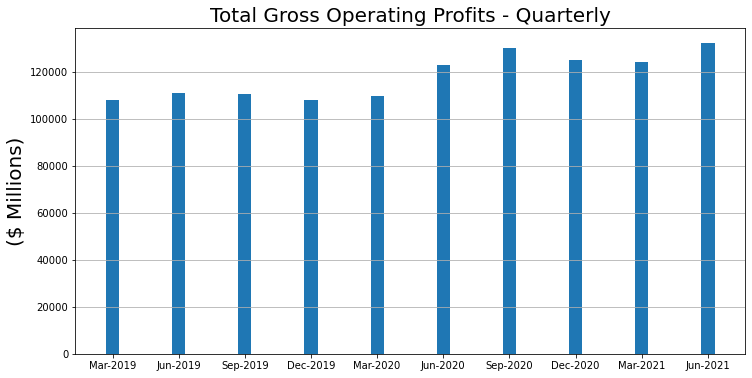

In [11]:
fig1, ax1 = plt.subplots(figsize=(12, 6))

plt.grid(b=None, which='major', axis='y')
plt.bar(quarter_data, total_GOPQ, color='tab:blue',align='center', width=.2 )
#plt.xlabel("Quarter",fontsize = 14)
plt.ylabel("($ Millions)",fontsize = 20)
plt.title("Total Gross Operating Profits - Quarterly", fontsize = 20)
plt.savefig("Analysis/Business/Total Business Gross Operating Profits.png")
plt.show()